# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы
# Бусаров Никита
## ВАРИАНТ 7

### Реализуйте рекурсивный алгоритм, распечатывающий по одному разу в лексикографическом порядке все последовательности длины $N$, составленные из натуральных чисел $1, 2, \ldots, K$.

In [1]:
from typing import List
from itertools import permutations
import pandas as pd
import numpy as np
import functools
from wand.image import Image as WImage

### Вспомогательные ф-ии

In [2]:
def toStr(my_list: List):
    """
    перевод списка в строку
    """
    return ''.join(str(x) for x in my_list)

def listToStr(my_list: List):
    """
    перевод списка списков в список строк
    """
    for i in range(len(my_list)):
        my_list[i] = toStr(my_list[i])
    return my_list

def faktorial(num: int):
    if num < 0:
        raise ValueError
    result = 1
    if num == 0:
        return result
    for i in range(1, num + 1):
        result *= i
    return result

def amountOfPermutations(n: int, k: int):
    return int(faktorial(n)/faktorial(n-k))

## Перестановки методом рекурсии

In [3]:
def permutations(K, N):
    global COUNTER
    if N == 0:
        return [[]]
    
    result = []
    for i in range(1, K+1):
        COUNTER += 1
        for perm in permutations(K, N-1):
            if i not in perm:
                result.append([i] + perm)
    return result

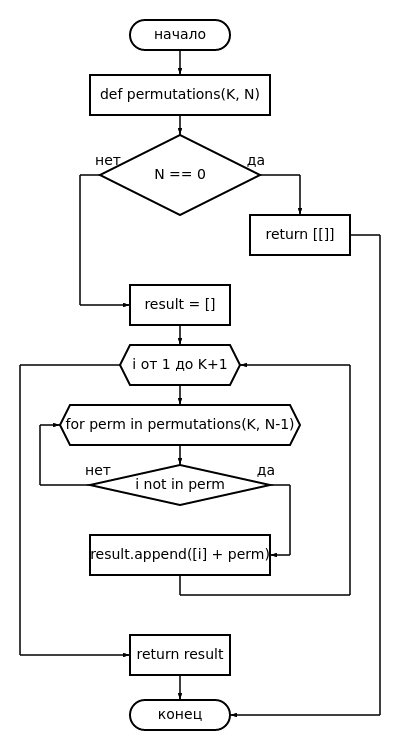

In [4]:
img = WImage(filename='./img/permutations.png')
img

### Максимальное число перед переполнением стека: 2971

In [5]:
try:
    COUNTER = 0
    max = 2972
    permutations(max, max)
except Exception as ex:
    print(ex)

maximum recursion depth exceeded in comparison


## Перестановки методом итерации

In [6]:
def permutations_iter(K, N, printing=False):
    """
    итеративная реализация перестановок длиной N из 0..K чисел
    """
    stack = [(set(), [])]
    global COUNTER
    while stack:
        used, curr = stack.pop()
        if len(curr) == N:
            if printing:
                print(toStr(curr))
        else:
            for i in range(1, K+1):
                if i not in used:
                    COUNTER += 1
                    stack.append((used | {i}, curr + [i]))
                    

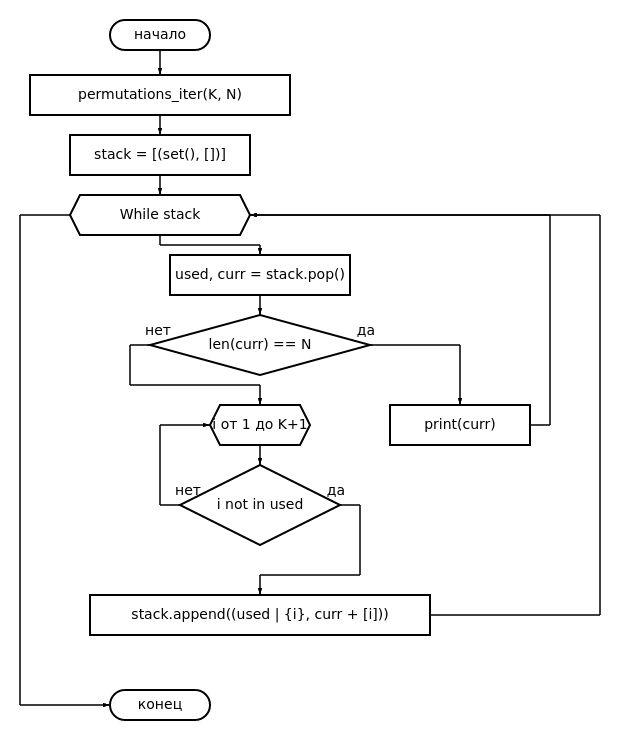

In [7]:
img = WImage(filename='./img/permutations_iter.png')
img

## Перестановки методом рекурсии с сохранением промежуточных результатов

In [8]:
def permutations_cached(K, N, cache={}):
    """
    рекурсивная реализация перестановок длиной N из 0..K чисел
    сохраняет промежуточные состояния
    """
    global COUNTER
    if N == 0:
        return [[]]
    if (K, N) in cache:
        return cache[(K, N)]
    COUNTER += 1
    result = []
    for i in range(1, K+1):
        for perm in permutations_cached(K, N-1, cache):
            if i not in perm:
                result.append([i] + perm)
    cache[(K, N)] = result
    return result

## Декоратор @memoized

In [9]:
def memoize(func):
    cache = {}

    def decorate(*args):
        if (args) in cache:
            return cache[args]
        else:
            cache[args] = func(*args)
            return cache[args]
    return decorate

In [10]:
@memoize
def permutations_memoized(k, n):
    global COUNTER
    if n == 0:
        return [[]]

    result = []
    for i in range(1, k+1):
        COUNTER += 1
        for perm in permutations_memoized(k, n-1):
            if i not in perm:
                result.append([i] + perm)
    return result

## Количество вызовов рекурсии
использую глобальную переменную

In [11]:
num = 8

COUNTER = 0
permutations(num, num)
print(f'for {num, num} amount of recursion calls in permutations: {COUNTER}') 

COUNTER = 0
my_list = permutations_cached(num, num)
print(f'for {num, num} amount of recursion calls in permutations_cached: {COUNTER}')

COUNTER = 0
permutations_memoized(num, num)
print(f'for {num, num} amount of recursion calls in permutations_memoized: {COUNTER}')

COUNTER = 0
permutations_iter(num, num)
print(f'for {num, num} amount of iterations in permutations_iter: {COUNTER}')

for (8, 8) amount of recursion calls in permutations: 19173960
for (8, 8) amount of recursion calls in permutations_cached: 8
for (8, 8) amount of recursion calls in permutations_memoized: 64
for (8, 8) amount of iterations in permutations_iter: 109600


# Тесты рекурсивного метода

In [12]:
%%time

results_n_n = []
for i in range(1, 6):
    result = permutations_cached(i, i)
    assert amountOfPermutations(i, i) == len(result), f'amount = {amountOfPermutations(i, i)}, len = {len(result)}'
    assert result == sorted(result)
    results_n_n.append(listToStr(list(result)))

    
results_5_n = []
for i in range(1, 5):
    result = permutations_cached(5, i)
    assert amountOfPermutations(5, i) == len(result), f'amount = {amountOfPermutations(5, i)}, len = {len(result)}'
    assert result == sorted(result)
    results_5_n.append(listToStr(list(result)))

CPU times: user 342 µs, sys: 11 µs, total: 353 µs
Wall time: 373 µs


## Табличка перестановок для чисел от 1..К (К макс = 5), длиной N (N макс = 5)

In [13]:
table_dict = {}
counter = 1

for i in results_n_n:
    for n in range(len(results_n_n[-1]) - len(i)):
        i.append(' ')
        
    table_dict['result_' + str(counter) + '_' + str(counter)] = i
    counter += 1
    
table_dict['result_5_5'] = results_n_n[-1]
counter = 1        
for i in results_5_n:
    for n in range(len(results_n_n[-1]) - len(i)):
        i.append(' ')
    table_dict['result_5_' + str(counter)] = i
    counter += 1
   
pd.set_option('display.max_rows', None)
table_df = pd.DataFrame(table_dict)
table_df


,result_1_1,result_2_2,result_3_3,result_4_4,result_5_5,result_5_1,result_5_2,result_5_3,result_5_4
0,1,12,123,1234,12345,1,12,123,1234
1,,21,132,1243,12354,2,13,124,1235
2,,,213,1324,12435,3,14,125,1243
3,,,231,1342,12453,4,15,132,1245
4,,,312,1423,12534,5,21,134,1253
5,,,321,1432,12543,,23,135,1254
6,,,,2134,13245,,24,142,1324
7,,,,2143,13254,,25,143,1325
8,,,,2314,13425,,31,145,1342
9,,,,2341,13452,,32,152,1345
